# Sentiment analysis on AIRBNB reviews

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spacy
from langdetect import detect
from spacytextblob.spacytextblob import SpacyTextBlob as stb
import seaborn as sns
import streamlit as st
from sklearn.metrics import r2_score

In [2]:
df1 = pd.read_csv('listings.csv')
df2 = pd.read_csv('listings_details.csv')
df3 = pd.read_csv('listings_details_full.csv')

C:\Users\nijo0\AppData\Local\Temp\ipykernel_14504\1658831969.py:2: DtypeWarning: Columns (87) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('listings_details.csv')
C:\Users\nijo0\AppData\Local\Temp\ipykernel_14504\1658831969.py:3: DtypeWarning: Columns (87) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv('listings_details_full.csv')


In [3]:
df1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,3,248,2018-11-28,2.10,1,44
1,3209,"Quiet apt near center, great view",3806,Maartje,NaN,Westerpark,52.390225,4.873924,Entire home/apt,160,4,42,2018-08-29,1.03,1,47
2,20168,100%Centre-Studio 1 Private Floor/Bathroom,59484,Alex,NaN,Centrum-Oost,52.365087,4.893541,Entire home/apt,80,1,233,2018-11-30,2.18,2,198
3,25428,Lovely apt in City Centre (Jordaan),56142,Joan,NaN,Centrum-West,52.373114,4.883668,Entire home/apt,125,14,1,2018-01-21,0.09,2,141
4,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.386727,4.892078,Private room,150,2,171,2018-11-25,2.03,1,199


In [4]:
df2.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20181206172549,2018-12-06,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",...,f,NaN,{Amsterdam},t,f,strict_14_with_grace_period,f,f,1,2.10
1,3209,https://www.airbnb.com/rooms/3209,20181206172549,2018-12-06,"Quiet apt near center, great view",You will love our spacious (90 m2) bright apar...,"Our apartment has lots of light, a balcony and...",You will love our spacious (90 m2) bright apar...,none,Welcome to the Spaarndammerbuurt! From the beg...,...,f,NaN,{Amsterdam},f,f,moderate,f,f,1,1.03
2,20168,https://www.airbnb.com/rooms/20168,20181206172549,2018-12-06,100%Centre-Studio 1 Private Floor/Bathroom,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",none,Located just in between famous central canals....,...,f,NaN,{Amsterdam},f,f,strict_14_with_grace_period,f,f,2,2.18
3,25428,https://www.airbnb.com/rooms/25428,20181206172549,2018-12-06,Lovely apt in City Centre (Jordaan),NaN,"This nicely furnished, newly renovated apt is...","This nicely furnished, newly renovated apt is...",none,NaN,...,f,NaN,{Amsterdam},f,f,strict_14_with_grace_period,f,f,2,0.09
4,27886,https://www.airbnb.com/rooms/27886,20181206172549,2018-12-06,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,none,"Central, quiet, safe, clean and beautiful.",...,f,NaN,{Amsterdam},t,f,strict_14_with_grace_period,f,f,1,2.03


In [5]:
reviews_df = pd.read_csv('reviews.csv')
reviews_df2 = pd.read_csv('reviews_details.csv')

In [6]:
reviews_df.head()

,listing_id,date
0,2818,2009-03-30
1,2818,2009-04-24
2,2818,2009-05-03
3,2818,2009-05-18
4,2818,2009-05-25


In [7]:
reviews_df.shape

(431830, 2)

In [8]:
reviews_df2.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2818,1191,2009-03-30,10952,Lam,Daniel is really cool. The place was nice and ...
1,2818,1771,2009-04-24,12798,Alice,Daniel is the most amazing host! His place is ...
2,2818,1989,2009-05-03,11869,Natalja,We had such a great time in Amsterdam. Daniel ...
3,2818,2797,2009-05-18,14064,Enrique,Very professional operation. Room is very clea...
4,2818,3151,2009-05-25,17977,Sherwin,Daniel is highly recommended. He provided all...


In [9]:
reviews_df2.shape

(431830, 6)

In [10]:
reviews_df2['comments'].dtype

dtype('O')

In [11]:
reviews_df2['comments_string']=reviews_df2['comments'].str[0:]
reviews_df2.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,comments_string
0,2818,1191,2009-03-30,10952,Lam,Daniel is really cool. The place was nice and ...,Daniel is really cool. The place was nice and ...
1,2818,1771,2009-04-24,12798,Alice,Daniel is the most amazing host! His place is ...,Daniel is the most amazing host! His place is ...
2,2818,1989,2009-05-03,11869,Natalja,We had such a great time in Amsterdam. Daniel ...,We had such a great time in Amsterdam. Daniel ...
3,2818,2797,2009-05-18,14064,Enrique,Very professional operation. Room is very clea...,Very professional operation. Room is very clea...
4,2818,3151,2009-05-25,17977,Sherwin,Daniel is highly recommended. He provided all...,Daniel is highly recommended. He provided all...


### Langdetect

In [12]:
reviews_df2['comments']=reviews_df2['comments'].dropna()
reviews_df2.shape

(431830, 7)

In [13]:
reviews_df3=reviews_df2.dropna()
reviews_df3.shape

(431300, 7)

In [14]:
reviews_df4=reviews_df3.reset_index(drop=True)
reviews_df4.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,comments_string
0,2818,1191,2009-03-30,10952,Lam,Daniel is really cool. The place was nice and ...,Daniel is really cool. The place was nice and ...
1,2818,1771,2009-04-24,12798,Alice,Daniel is the most amazing host! His place is ...,Daniel is the most amazing host! His place is ...
2,2818,1989,2009-05-03,11869,Natalja,We had such a great time in Amsterdam. Daniel ...,We had such a great time in Amsterdam. Daniel ...
3,2818,2797,2009-05-18,14064,Enrique,Very professional operation. Room is very clea...,Very professional operation. Room is very clea...
4,2818,3151,2009-05-25,17977,Sherwin,Daniel is highly recommended. He provided all...,Daniel is highly recommended. He provided all...


In [15]:
print(reviews_df4.comments[1069:1075])
reviews_df4.comments[1071]

1069    Unfortunately we travel on holidays season and...
1070    Apartment was very clean, nicely decorated and...
1071                                                    .
1072    Michele est très accueillant. Il est toujours ...
1073    Michele is a great host, good location, very q...
1074    Everything went fine, from the beginning to th...
Name: comments, dtype: object


'.'

In [16]:
reviews_df4['comments']=reviews_df4['comments'].str.replace('[^\w\s]', " ")
reviews_df4['comments']=reviews_df4['comments'].str.replace('\d+', '') 
reviews_df4['comments']=reviews_df4['comments'].str.lower()
reviews_df4['comments']=reviews_df4['comments'].str.replace('\r\n', " ")
reviews_df4['comments']=reviews_df4['comments'].str.replace('\s+', ' ')
#reviews_df4=reviews_df4[reviews_df4['comments'].notnull()]

C:\Users\nijo0\AppData\Local\Temp\ipykernel_17332\2640529666.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews_df4['comments']=reviews_df4['comments'].str.replace('[^\w\s]', " ")
C:\Users\nijo0\AppData\Local\Temp\ipykernel_17332\2640529666.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews_df4['comments']=reviews_df4['comments'].str.replace('\d+', '')
C:\Users\nijo0\AppData\Local\Temp\ipykernel_17332\2640529666.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews_df4['comments']=reviews_df4['comments'].str.replace('\s+', ' ')


In [17]:
print(reviews_df4.comments[1069:1075])
reviews_df4.comments[1071]

1069    unfortunately we travel on holidays season and...
1070    apartment was very clean nicely decorated and ...
1071                                                     
1072    michele est très accueillant il est toujours à...
1073     michele is a great host good location very quiet
1074    everything went fine from the beginning to the...
Name: comments, dtype: object


' '

In [18]:
reviews_df4.comments[1069:1075].isna().sum()

0

In [19]:
reviews_df5=reviews_df4.reset_index(drop=True)

In [21]:
reviews_df5['str_length']=0
for i in range(len(reviews_df5)):
    if (len(reviews_df5.comments[i])<20):
        reviews_df5.str_length.iloc[i]=1
        

C:\Users\nijo0\AppData\Local\Temp\ipykernel_17332\4010455983.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df5.str_length.iloc[i]=1


In [22]:
reviews_df5.str_length.sum()

7658

In [23]:
#reviews_df6=reviews_df5.reset_index(drop=True)
reviews_df5.head(1074)

,listing_id,id,date,reviewer_id,reviewer_name,comments,comments_string,str_length
0,2818,1191,2009-03-30,10952,Lam,daniel is really cool the place was nice and c...,Daniel is really cool. The place was nice and ...,0
1,2818,1771,2009-04-24,12798,Alice,daniel is the most amazing host his place is e...,Daniel is the most amazing host! His place is ...,0
2,2818,1989,2009-05-03,11869,Natalja,we had such a great time in amsterdam daniel i...,We had such a great time in Amsterdam. Daniel ...,0
3,2818,2797,2009-05-18,14064,Enrique,very professional operation room is very clean...,Very professional operation. Room is very clea...,0
4,2818,3151,2009-05-25,17977,Sherwin,daniel is highly recommended he provided all n...,Daniel is highly recommended. He provided all...,0
...,...,...,...,...,...,...,...,...
1069,28658,221359389,2017-12-26,26267155,Eder,unfortunately we travel on holidays season and...,Unfortunately we travel on holidays season and...,0
1070,28658,224089321,2018-01-02,44334965,Zeynep,apartment was very clean nicely decorated and ...,"Apartment was very clean, nicely decorated and...",0
1071,28658,225376074,2018-01-06,156519085,Yelena Levy,,.,1
1072,28658,229159362,2018-01-22,165762822,Gaëtan,michele est très accueillant il est toujours à...,Michele est très accueillant. Il est toujours ...,0


In [24]:
reviews_df6= reviews_df5.drop(reviews_df5[reviews_df5.str_length == 1].index)

In [25]:
reviews_df5.shape

(431300, 8)

In [26]:
reviews_df6.head(1080)

,listing_id,id,date,reviewer_id,reviewer_name,comments,comments_string,str_length
0,2818,1191,2009-03-30,10952,Lam,daniel is really cool the place was nice and c...,Daniel is really cool. The place was nice and ...,0
1,2818,1771,2009-04-24,12798,Alice,daniel is the most amazing host his place is e...,Daniel is the most amazing host! His place is ...,0
2,2818,1989,2009-05-03,11869,Natalja,we had such a great time in amsterdam daniel i...,We had such a great time in Amsterdam. Daniel ...,0
3,2818,2797,2009-05-18,14064,Enrique,very professional operation room is very clean...,Very professional operation. Room is very clea...,0
4,2818,3151,2009-05-25,17977,Sherwin,daniel is highly recommended he provided all n...,Daniel is highly recommended. He provided all...,0
...,...,...,...,...,...,...,...,...
1091,28658,263443522,2018-05-12,165892365,Karen,michele nos recebeu muito bem em sua casa tend...,"Michele nos recebeu muito bem em sua casa, ten...",0
1092,28658,266433689,2018-05-20,44147666,Serge,logement bien situé par rapport aux transports...,Logement bien situé par rapport aux transports...,0
1093,28658,268448852,2018-05-25,170770092,Alexandra,michele was an excellent host he was available...,Michele was an excellent host! He was availabl...,0
1094,28658,270519441,2018-05-29,41644510,Irene,luogo raggiungibile facilmente con i mezzi di ...,Luogo raggiungibile facilmente con i mezzi di ...,0


In [27]:
reviews_df7=reviews_df6.reset_index(drop=True)
reviews_df7.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,comments_string,str_length
0,2818,1191,2009-03-30,10952,Lam,daniel is really cool the place was nice and c...,Daniel is really cool. The place was nice and ...,0
1,2818,1771,2009-04-24,12798,Alice,daniel is the most amazing host his place is e...,Daniel is the most amazing host! His place is ...,0
2,2818,1989,2009-05-03,11869,Natalja,we had such a great time in amsterdam daniel i...,We had such a great time in Amsterdam. Daniel ...,0
3,2818,2797,2009-05-18,14064,Enrique,very professional operation room is very clean...,Very professional operation. Room is very clea...,0
4,2818,3151,2009-05-25,17977,Sherwin,daniel is highly recommended he provided all n...,Daniel is highly recommended. He provided all...,0


In [28]:
language=[]
for i in range(len(reviews_df7)):
        lang=detect(reviews_df7.comments[i])
        language.append(lang)


In [29]:
print('hij is klaar')

hij is klaar


In [30]:
reviews_df7['language']=language

In [31]:
reviews_df7.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,comments_string,str_length,language
0,2818,1191,2009-03-30,10952,Lam,daniel is really cool the place was nice and c...,Daniel is really cool. The place was nice and ...,0,en
1,2818,1771,2009-04-24,12798,Alice,daniel is the most amazing host his place is e...,Daniel is the most amazing host! His place is ...,0,en
2,2818,1989,2009-05-03,11869,Natalja,we had such a great time in amsterdam daniel i...,We had such a great time in Amsterdam. Daniel ...,0,en
3,2818,2797,2009-05-18,14064,Enrique,very professional operation room is very clean...,Very professional operation. Room is very clea...,0,en
4,2818,3151,2009-05-25,17977,Sherwin,daniel is highly recommended he provided all n...,Daniel is highly recommended. He provided all...,0,en


In [2]:
#SLA TUSSENTIJDS OP ZODAT IK DEZE GRAP NIET NOG EEN KEER HOEF TE DOEN!!!!
reviews_df7.to_csv('reviews+language.csv')

NameError: name 'reviews_df7' is not defined

importeer gegenereerde csv, zodat de language kolom niet nog een keer gemaakt hoeft te worden (duurt 45 minuten)

In [5]:
#read de language csv en maak er een df van
langdf=pd.read_csv('reviews+language.csv')

In [6]:
langdf.language.unique()

array(['en', 'fr', 'de', 'it', 'es', 'zh-cn', 'da', 'ko', 'nl', 'pt',
       'el', 'no', 'tr', 'ru', 'cs', 'ja', 'af', 'sv', 'ca', 'ro', 'hu',
       'pl', 'hr', 'fi', 'zh-tw', 'bg', 'he', 'vi', 'id', 'so', 'sl',
       'cy', 'tl', 'sk', 'ar', 'uk', 'th', 'et', 'sw', 'lt', 'sq'],
      dtype=object)

In [7]:
langdf.language.value_counts()

en       343670
fr        30636
de        16161
es        11311
nl         6420
it         6199
pt         2205
ru         1666
ko         1007
zh-cn       844
da          524
no          422
sv          417
ca          256
tr          240
ro          224
fi          222
af          219
ja          187
cs          174
pl          155
hu          104
el          104
he           62
hr           37
zh-tw        34
cy           16
et           15
tl           14
sk           14
id           11
ar           11
uk           11
sl            9
so            8
th            8
vi            7
lt            6
bg            5
sw            5
sq            2
Name: language, dtype: int64

In [8]:
# maak de naam wat korter, werkt straks makkelijker tijdens het subsetten
df=langdf

In [9]:
df.shape

(423642, 10)

subset dataframe zodat alleen de belangrijkste 5 talen (engels, frans, duits, spaans en nederlands) overblijven

In [10]:
#reviews_df8=df[((df['language']=='en') | (df['language']=='fr') | (df['language']=='de') | (df['language']=='es') | (df['language']=='nlp'))]
reviews_df8=df[df['language']=='en']

In [11]:
reviews_df8.shape

(343670, 10)

In [27]:
reviews_df8.head(343670)

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,comments_string,str_length,language
0,0,2818,1191,2009-03-30,10952,Lam,daniel is really cool the place was nice and c...,Daniel is really cool. The place was nice and ...,0,en
1,1,2818,1771,2009-04-24,12798,Alice,daniel is the most amazing host his place is e...,Daniel is the most amazing host! His place is ...,0,en
2,2,2818,1989,2009-05-03,11869,Natalja,we had such a great time in amsterdam daniel i...,We had such a great time in Amsterdam. Daniel ...,0,en
3,3,2818,2797,2009-05-18,14064,Enrique,very professional operation room is very clean...,Very professional operation. Room is very clea...,0,en
4,4,2818,3151,2009-05-25,17977,Sherwin,daniel is highly recommended he provided all n...,Daniel is highly recommended. He provided all...,0,en
...,...,...,...,...,...,...,...,...,...,...
343665,423636,30433356,355152237,2018-12-03,185768463,Winnie,the host canceled this reservation days before...,The host canceled this reservation 28 days bef...,0,en
343666,423637,30435529,355474875,2018-12-04,131376847,Andy,the host canceled this reservation the day bef...,The host canceled this reservation the day bef...,0,en
343667,423638,30439111,355041813,2018-12-02,103201416,Mohammed,the host canceled this reservation days before...,The host canceled this reservation 20 days bef...,0,en
343668,423639,30518120,355519016,2018-12-04,228738702,Valeriya,the host canceled this reservation days before...,The host canceled this reservation 22 days bef...,0,en


In [13]:
reviews_df8=reviews_df8.reset_index(drop=True)

In [14]:
reviews_df8.comments.isna().sum()

0

In [15]:
#load the languages according to spacy
#nl = spacy.load("nl_core_news_md")
#nl.add_pipe('spacytextblob')

en = spacy.load("en_core_web_sm")
en.add_pipe('spacytextblob')

#de = spacy.load("de_core_news_sm")
#de.add_pipe('spacytextblob')

#es = spacy.load("es_core_news_sm")
#es.add_pipe('spacytextblob')

#fr = spacy.load("fr_core_news_sm")
#fr.add_pipe('spacytextblob')

In [32]:
# make empty cells
doc=[]
polarity=[]
subjectivity=[]
assessments=[]

for i in range(300000, 300001):
    if(reviews_df8.language[i-300000]=='en'):
        doc.append(en(reviews_df8.comments[i]))
        polarity.append(doc[i-300000]._.polarity)
        #subjectivity.append(doc[i]._.subjectivity)
        #assessments[i]=doc[i]._.assessments

    #elif(reviews_df8.language[i]=='fr'):
        #doc.append(fr(reviews_df8.comments[i]))
        #polarity.append(doc[i]._.polarity)
        #subjectivity.append(doc[i]._.subjectivity)
        #assessments[i]=doc[i]._.assessments
        
    #elif(reviews_df8.language[i]=='de'):
        #doc.append(de(reviews_df8.comments[i]))
        #polarity.append(doc[i]._.polarity)
        #subjectivity.append(doc[i]._.subjectivity)
        #assessments[i]=doc[i]._.assessments
        
    #elif(reviews_df8.language[i]=='es'):
        #doc.append(es(reviews_df8.comments[i]))
        #polarity.append(doc[i]._.polarity)
        #subjectivity.append(doc[i]._.subjectivity)
        #assessments[i]=doc[i]._.assessments   
        
    #elif(reviews_df8.language[i]=='nl'):
        #doc.append(nl(reviews_df8.comments[i]))
        #polarity.append(doc[i]._.polarity)
        #subjectivity.append(doc[i]._.subjectivity)
        #assessments[i]=doc[i]._.assessments
    else:
        doc.append('no')
        polarity.append('no')
        subjectivity.append('no')

nummer300k = pd.DataFrame(polarity)

IndexError: list index out of range

In [18]:
nummer100k.head()

,0
0,0.324667


In [20]:
nummer150k.head()

,0
0,0.356667


In [22]:
nummer200k.head()

,0
0,0.305952


In [24]:
nummer250k

,0
0,0.499259


In [33]:
nummer300k.head()

,0
0,0.31875


In [64]:
nummer343k

""


In [54]:
polarity50k=pd.DataFrame(polarity)
polarity50k.shape
polarity50k.to_csv('50k')

In [55]:
polarity100k.shape
polarity100k.to_csv('100k')

In [56]:
polarity150k.shape
polarity150k.to_csv('150k')


In [57]:
polarity200k.shape
polarity200k.to_csv('200k')

In [58]:
polarity250k.shape
polarity250k.to_csv('250k')

In [59]:
polarity300k.head()
polarity300k.to_csv('300k')

In [60]:
polarity343k.head()
polarity343k.to_csv('343k')

In [34]:
polarity50k = pd.read_csv('50k', index_col=False)
polarity100k= pd.read_csv('100k', index_col=False)
polarity150k= pd.read_csv('150k', index_col=False)
polarity200k= pd.read_csv('200k', index_col=False)
polarity250k= pd.read_csv('250k', index_col=False)
polarity300k= pd.read_csv('300k', index_col=False)
polarity343k= pd.read_csv('343k', index_col=False)

In [35]:
polarity50k=polarity50k.drop('Unnamed: 0', axis = 1)
polarity100k=polarity100k.drop('Unnamed: 0', axis = 1)
polarity150k=polarity150k.drop('Unnamed: 0', axis = 1)
polarity200k=polarity200k.drop('Unnamed: 0', axis = 1)
polarity250k=polarity250k.drop('Unnamed: 0', axis = 1)
polarity300k=polarity300k.drop('Unnamed: 0', axis = 1)
polarity343k=polarity343k.drop('Unnamed: 0', axis = 1)

In [36]:
vertical_stack=pd.concat([polarity50k, polarity100k, nummer100k, polarity150k, nummer150k, polarity200k, nummer200k, polarity250k, nummer250k, polarity300k, nummer300k, polarity343k], axis=0)

In [37]:
vertical_stack.shape

(343669, 2)

In [38]:
vertical_stack.head()

,0,0
0,0.135185,NaN
1,0.333611,NaN
2,0.313681,NaN
3,0.451111,NaN
4,0.222778,NaN


In [39]:
vertical_stack = vertical_stack.drop(vertical_stack.columns[1], axis=1)

In [40]:
vertical_stack.shape

(343669, 1)

In [41]:
reviews_df8.shape

(343670, 10)

In [42]:
vertical_stack = vertical_stack.reset_index()
reviews_df8 = reviews_df8.reset_index()

In [43]:
df_merged = pd.concat([reviews_df8, vertical_stack], axis=1)

In [44]:
df_merged.head()

,index,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,comments_string,str_length,language,index,0
0,0,0,2818,1191,2009-03-30,10952,Lam,daniel is really cool the place was nice and c...,Daniel is really cool. The place was nice and ...,0,en,0.0,0.135185
1,1,1,2818,1771,2009-04-24,12798,Alice,daniel is the most amazing host his place is e...,Daniel is the most amazing host! His place is ...,0,en,1.0,0.333611
2,2,2,2818,1989,2009-05-03,11869,Natalja,we had such a great time in amsterdam daniel i...,We had such a great time in Amsterdam. Daniel ...,0,en,2.0,0.313681
3,3,3,2818,2797,2009-05-18,14064,Enrique,very professional operation room is very clean...,Very professional operation. Room is very clea...,0,en,3.0,0.451111
4,4,4,2818,3151,2009-05-25,17977,Sherwin,daniel is highly recommended he provided all n...,Daniel is highly recommended. He provided all...,0,en,4.0,0.222778


In [45]:
#df_merged = df_merged.drop('Unnamed: 0', axis = 1)
#df_merged = df_merged.drop('index', axis = 1)
#df_merged = df_merged.drop('str_length', axis = 1)
df_merged.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,comments_string,language,0
0,2818,1191,2009-03-30,10952,Lam,daniel is really cool the place was nice and c...,Daniel is really cool. The place was nice and ...,en,0.135185
1,2818,1771,2009-04-24,12798,Alice,daniel is the most amazing host his place is e...,Daniel is the most amazing host! His place is ...,en,0.333611
2,2818,1989,2009-05-03,11869,Natalja,we had such a great time in amsterdam daniel i...,We had such a great time in Amsterdam. Daniel ...,en,0.313681
3,2818,2797,2009-05-18,14064,Enrique,very professional operation room is very clean...,Very professional operation. Room is very clea...,en,0.451111
4,2818,3151,2009-05-25,17977,Sherwin,daniel is highly recommended he provided all n...,Daniel is highly recommended. He provided all...,en,0.222778


(array([2.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 2.0000e+00, 6.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 5.0000e+00, 1.0000e+00, 3.0000e+00,
        7.0000e+00, 0.0000e+00, 3.0000e+00, 2.0000e+00, 2.0000e+00,
        2.2000e+01, 3.0000e+00, 5.0000e+00, 7.0000e+00, 3.0000e+00,
        1.9000e+01, 8.0000e+00, 1.3000e+01, 1.6000e+01, 3.0000e+01,
        2.4000e+01, 2.1000e+01, 6.1000e+01, 4.2000e+01, 5.0000e+01,
        7.4000e+01, 8.6000e+01, 9.9000e+01, 1.1300e+02, 1.8500e+02,
        1.7400e+02, 2.4100e+02, 2.7300e+02, 3.7300e+02, 3.9700e+02,
        9.6100e+03, 7.7700e+02, 1.0600e+03, 1.3750e+03, 2.1720e+03,
        2.2390e+03, 3.2710e+03, 4.1280e+03, 5.5080e+03, 6.9480e+03,
        9.1060e+03, 1.0088e+04, 1.2284e+04, 1.3970e+04, 1.6463e+04,
        1.5729e+04, 1.7804e+04, 1.8312e+04, 1.7915e+04, 1.9649e+04,
        1.5159e+04, 1.5559e+04, 1.4868e+04, 1.30

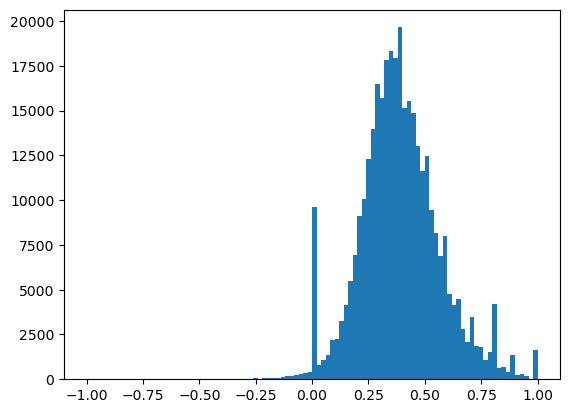

In [46]:
plt.hist(df_merged['0'], bins=100)

In [47]:
df_merged = df_merged.rename(columns = {'0': 'Polarity_Score'})

In [48]:
df_merged.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,comments_string,language,Polarity_Score
0,2818,1191,2009-03-30,10952,Lam,daniel is really cool the place was nice and c...,Daniel is really cool. The place was nice and ...,en,0.135185
1,2818,1771,2009-04-24,12798,Alice,daniel is the most amazing host his place is e...,Daniel is the most amazing host! His place is ...,en,0.333611
2,2818,1989,2009-05-03,11869,Natalja,we had such a great time in amsterdam daniel i...,We had such a great time in Amsterdam. Daniel ...,en,0.313681
3,2818,2797,2009-05-18,14064,Enrique,very professional operation room is very clean...,Very professional operation. Room is very clea...,en,0.451111
4,2818,3151,2009-05-25,17977,Sherwin,daniel is highly recommended he provided all n...,Daniel is highly recommended. He provided all...,en,0.222778


In [221]:
df_merged.shape

(343669, 10)

In [49]:
#Polarity score naar positief/negatief
positive = []

for i in range(0, len(df_merged)):
    if(df_merged['Polarity_Score'][i]>0):
        positive.append(1)
    else:
        positive.append(0)

df_merged['positive']=positive

In [50]:
df_merged.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,comments_string,language,Polarity_Score,positive
0,2818,1191,2009-03-30,10952,Lam,daniel is really cool the place was nice and c...,Daniel is really cool. The place was nice and ...,en,0.135185,1
1,2818,1771,2009-04-24,12798,Alice,daniel is the most amazing host his place is e...,Daniel is the most amazing host! His place is ...,en,0.333611,1
2,2818,1989,2009-05-03,11869,Natalja,we had such a great time in amsterdam daniel i...,We had such a great time in Amsterdam. Daniel ...,en,0.313681,1
3,2818,2797,2009-05-18,14064,Enrique,very professional operation room is very clean...,Very professional operation. Room is very clea...,en,0.451111,1
4,2818,3151,2009-05-25,17977,Sherwin,daniel is highly recommended he provided all n...,Daniel is highly recommended. He provided all...,en,0.222778,1


In [51]:
listingscore = df_merged.groupby(df_merged['listing_id'])['positive'].mean()
listingscore_df = pd.DataFrame(listingscore)

In [52]:
listingspolarity = df_merged.groupby(df_merged['listing_id'])['Polarity_Score'].mean()
listingspolarity_df = pd.DataFrame(listingspolarity)

In [53]:
listingspolarity_df.head()

,Polarity_Score
listing_id,
2818,0.370505
3209,0.396585
20168,0.321653
25428,0.506875
27886,0.435719


In [54]:
listingspolarity_df['Polarity_Score']=(listingspolarity_df['Polarity_Score']+1)*50

In [55]:
listingspolarity_df.shape

(17310, 1)

In [58]:
listingspolarity_df.head()

,Polarity_Score
listing_id,
2818,68.525265
3209,69.829261
20168,66.082649
25428,75.343750
27886,71.785949


In [59]:
listingscore_df.head(17309)

,positive
listing_id,
2818,0.985366
3209,0.933333
20168,0.954082
25428,1.000000
27886,0.992958
...,...
30423566,1.000000
30433356,0.000000
30435529,0.000000


(array([3.1100e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        7.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        6.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 3.9000e+01, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        1.8000e+01, 0.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        3.1100e+02, 0.0000e+00, 1.0000e+00, 2.0000e+00, 2.0000e+00,
        4.0000e+00, 0.0000e+00, 1.6000e+01, 2.0000e+00, 0.0000e+00,
        2.9000e+01, 1.0000e+00, 1.4000e+01, 6.0000e+00, 3.0000e+00,
        0.0000e+00, 3.0700e+02, 1.0000e+00, 5.0000e+00, 2.7000e+01,
        8.0000e+00, 3.9000e+01, 1.0000e+01, 1.10

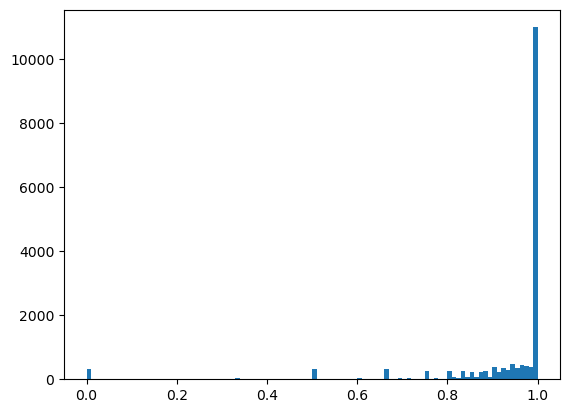

In [57]:
plt.hist(listingscore_df['positive'], bins = 100)

## VERGELIJKEN POLARITY MET ECHTE RATINGS

In [61]:
df3.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [60]:
reviewscores_df = df3['review_scores_rating']
print(reviewscores_df.isna().sum())
print(reviewscores_df.shape)

2639
(20030,)


In [62]:
reviewscores_df = df3[['id', 'review_scores_rating', 'number_of_reviews']]
reviewscores_df.head()

,id,review_scores_rating,number_of_reviews
0,2818,97.0,248
1,3209,96.0,42
2,20168,87.0,233
3,25428,100.0,1
4,27886,99.0,171


In [63]:
reviewscores_df = reviewscores_df.dropna(axis='rows')

In [64]:
listings_merged = listingscore_df.merge(reviewscores_df, left_on='listing_id', right_on='id')

In [65]:
listings_merged = listings_merged.merge(listingspolarity_df, left_on='id', right_on = 'listing_id')

In [66]:
listings_merged.shape

(17077, 5)

In [67]:
listings_merged.head()

,positive,id,review_scores_rating,number_of_reviews,Polarity_Score
0,0.985366,2818,97.0,248,68.525265
1,0.933333,3209,96.0,42,69.829261
2,0.954082,20168,87.0,233,66.082649
3,1.000000,25428,100.0,1,75.343750
4,0.992958,27886,99.0,171,71.785949


In [68]:
listings_merged['positive'] = listings_merged['positive']*100

In [69]:
listings_merged['number_of_reviews'].value_counts()

2      1106
3      1052
1       965
4       953
5       853
       ... 
576       1
373       1
227       1
602       1
240       1
Name: number_of_reviews, Length: 353, dtype: int64

In [70]:
listings_merged = listings_merged.drop(listings_merged[listings_merged['number_of_reviews']<5].index)

In [71]:
listings_merged['number_of_reviews'].value_counts()

5      853
6      778
7      725
8      650
9      586
      ... 
370      1
260      1
499      1
389      1
240      1
Name: number_of_reviews, Length: 349, dtype: int64

<AxesSubplot:xlabel='Polarity_Score', ylabel='review_scores_rating'>

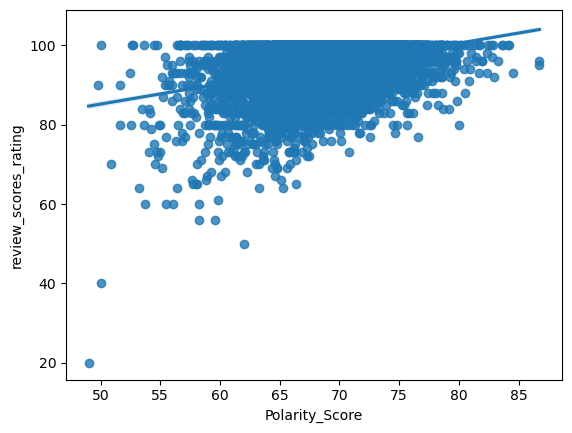

In [72]:
sns.regplot(data=listings_merged, x='Polarity_Score', y = 'review_scores_rating')

<AxesSubplot:xlabel='positive'>

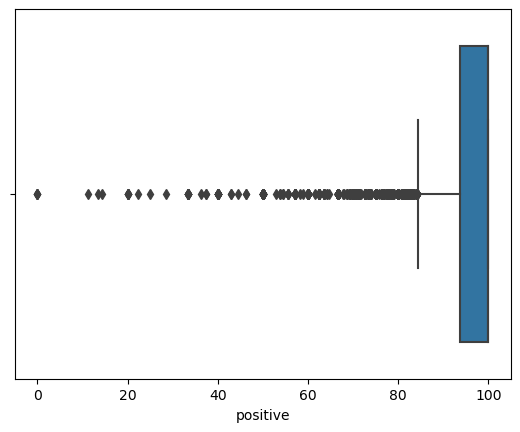

In [73]:
sns.boxplot(data=listings_merged, x='positive')
#sns.boxplot(data=listings_merged, x='review_scores_rating')

<AxesSubplot:xlabel='review_scores_rating'>

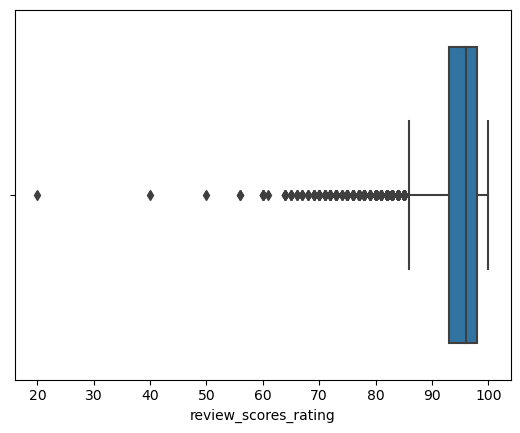

In [74]:
sns.boxplot(data=listings_merged, x='review_scores_rating')

In [75]:
listings_merged_melted = pd.melt(listings_merged[['positive','review_scores_rating']])

In [76]:
listings_merged

,positive,id,review_scores_rating,number_of_reviews,Polarity_Score
0,98.536585,2818,97.0,248,68.525265
1,93.333333,3209,96.0,42,69.829261
2,95.408163,20168,87.0,233,66.082649
4,99.295775,27886,99.0,171,71.785949
5,99.390244,28658,93.0,434,69.920556
...,...,...,...,...,...
16971,100.000000,29734820,93.0,6,64.070000
16988,100.000000,29799483,90.0,6,70.413360
16994,100.000000,29826403,100.0,5,72.136237
16999,80.000000,29848509,96.0,6,65.361742


In [77]:
listings_merged_melted

,variable,value
0,positive,98.536585
1,positive,93.333333
2,positive,95.408163
3,positive,99.295775
4,positive,99.390244
...,...,...
25997,review_scores_rating,93.000000
25998,review_scores_rating,90.000000
25999,review_scores_rating,100.000000
26000,review_scores_rating,96.000000


<AxesSubplot:xlabel='value', ylabel='variable'>

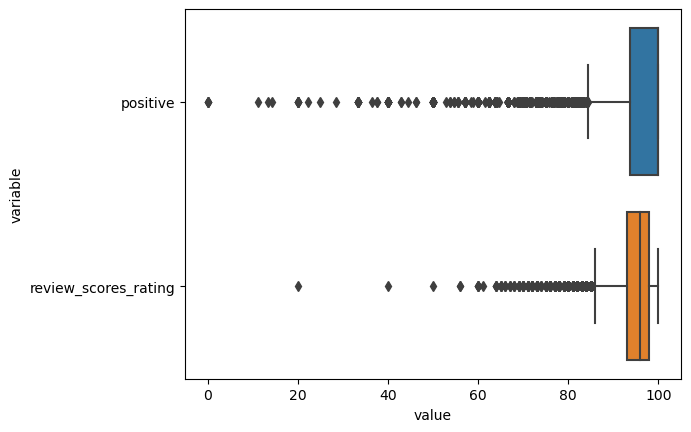

In [78]:
sns.boxplot(y='variable',x='value',data=listings_merged_melted)

In [81]:
pd.set_option("display.max_colwidth", -1)

C:\Users\nijo0\AppData\Local\Temp\ipykernel_14504\2475433900.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


In [82]:
listings_merged.head()

,positive,id,review_scores_rating,number_of_reviews,Polarity_Score
0,98.536585,2818,97.0,248,68.525265
1,93.333333,3209,96.0,42,69.829261
2,95.408163,20168,87.0,233,66.082649
4,99.295775,27886,99.0,171,71.785949
5,99.390244,28658,93.0,434,69.920556


In [84]:
listings_merged = listings_merged[['id', 'number_of_reviews', 'review_scores_rating', 'Polarity_Score', 'positive']]

In [85]:
listings_merged.head()

,id,number_of_reviews,review_scores_rating,Polarity_Score,positive
0,2818,248,97.0,68.525265,98.536585
1,3209,42,96.0,69.829261,93.333333
2,20168,233,87.0,66.082649,95.408163
4,27886,171,99.0,71.785949,99.295775
5,28658,434,93.0,69.920556,99.390244


In [86]:
listings_merged.to_csv('airBNB_ratings+model.csv')

In [3]:
listings_merged = pd.read_csv('airBNB_ratings+model.csv')

In [4]:
listings_merged.head()

,Unnamed: 0,id,number_of_reviews,review_scores_rating,Polarity_Score,positive
0,0,2818,248,97.0,68.525265,98.536585
1,1,3209,42,96.0,69.829261,93.333333
2,2,20168,233,87.0,66.082649,95.408163
3,4,27886,171,99.0,71.785949,99.295775
4,5,28658,434,93.0,69.920556,99.390244


In [6]:
listings_merged = listings_merged.drop('Unnamed: 0', axis = 1)

In [8]:
listings_merged.head()

,id,number_of_reviews,review_scores_rating,Polarity_Score,positive
0,2818,248,97.0,68.525265,98.536585
1,3209,42,96.0,69.829261,93.333333
2,20168,233,87.0,66.082649,95.408163
3,27886,171,99.0,71.785949,99.295775
4,28658,434,93.0,69.920556,99.390244


In [10]:
RealScoring=[]

for i in range(len(listings_merged)):
    RealScoring.append((listings_merged['review_scores_rating'][i])-(listings_merged['positive'][i]))
    
listings_merged['accuracy']=RealScoring

In [11]:
listings_merged.head()

,id,number_of_reviews,review_scores_rating,Polarity_Score,positive,accuracy
0,2818,248,97.0,68.525265,98.536585,-1.536585
1,3209,42,96.0,69.829261,93.333333,2.666667
2,20168,233,87.0,66.082649,95.408163,-8.408163
3,27886,171,99.0,71.785949,99.295775,-0.295775
4,28658,434,93.0,69.920556,99.390244,-6.390244


<AxesSubplot:>

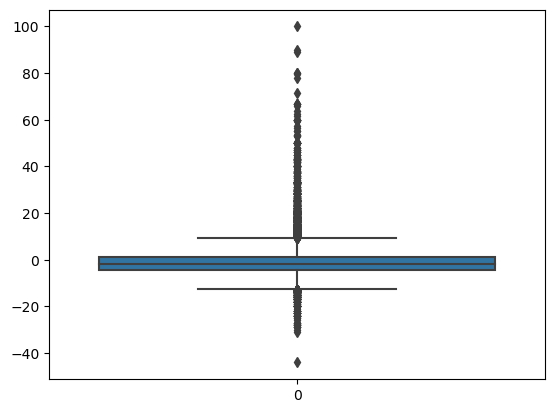

In [12]:
sns.boxplot(data=listings_merged['accuracy'])

In [19]:
toobigsmalllist=[]
for i in range(len(listings_merged)):
    if(listings_merged.accuracy[i]>10 or listings_merged.accuracy[i]<-10):
        toobigsmalllist.append(True)

In [22]:
len(toobigsmalllist)

1891

In [24]:
listings_merged.shape

(13001, 6)

In [25]:
listings_merged.to_csv('AccuracyDF.csv')

In [3]:
accuracydf=pd.read_csv('AccuracyDF.csv')

In [4]:
accuracydf.head()

,Unnamed: 0,id,number_of_reviews,review_scores_rating,Polarity_Score,positive,accuracy
0,0,2818,248,97.0,68.525265,98.536585,-1.536585
1,1,3209,42,96.0,69.829261,93.333333,2.666667
2,2,20168,233,87.0,66.082649,95.408163,-8.408163
3,3,27886,171,99.0,71.785949,99.295775,-0.295775
4,4,28658,434,93.0,69.920556,99.390244,-6.390244


In [5]:
r2_score([1,2,3],[4,5,7])

-16.0

In [9]:
r2_score([1,2,3],[1,2,4])

0.5